# Chess Dataset Perceptron

## 1. Introduction
The goal of this project is to apply the Perceptron classification technique on the Lichess chess dataset to predict the victory status of games, which includes outcomes such as checkmate, resignation, timeout, or draw. By analyzing various features such as player ratings, number of moves, opening strategies, and game duration, we aim to identify the factors most strongly associated with each type of victory. We will explore the performance of the Perceptron model, evaluating how well it can classify the different victory outcomes. Additionally, we will assess the effectiveness of the Perceptron in capturing the complex relationships between game features and outcomes. Through this evaluation, we aim to understand how the linear decision boundaries of the Perceptron affect predictive accuracy and the model's ability to generalize to unseen data.

## 2. Preprocessing Data 

The chess dataset is prepared by removing irrelevant columns and separating the target variable `victory_status` from the features. Categorical values are label-encoded, and the features are standardized for uniformity. Finally, the data is split into training (80%) and test (20%) sets for model evaluation.

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
data_path = '../../data/raw_data/chess/games.csv'
df = pd.read_csv(data_path)

# Drop irrelevant columns
x = df.drop(columns=['id', 'created_at', 'last_move_at', 'victory_status',
                      'winner', 'white_id', 'black_id', 'moves'])
y = df['victory_status']

# Encode categorical features using LabelEncoder for simplicity
label_encoder = LabelEncoder()
x_encoded = x.apply(label_encoder.fit_transform)

# Encode the target variable for binary classification
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_encoded)

# Split the dataset into training and test sets (70% training, 30% testing)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_encoded, 
                                                    test_size=0.2, random_state=4)


## 3. Model Creation 

In [24]:
# Import necessary libraries
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Perceptron model with major parameters
perceptron = Perceptron(
    max_iter=200,       # Maximum number of iterations
    tol=0.001,            # Stopping threshold
    eta0=1.0,            # Initial learning rate
    shuffle=True,        # Shuffle training data
    random_state=42       # For reproducibility
)

# Train the perceptron on the training data
perceptron.fit(x_train, y_train)

# Make predictions on the test data
y_pred = perceptron.predict(x_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.5499
Precision: 0.4657
Recall: 0.5499
F1 Score: 0.4941


## 4. Hyperparameter Tuning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function for grid search and plotting
def grid_search_hyperparameters(max_iter_values, tol_values, eta0_values, x_train, y_train, x_test, y_test):
    # Store results
    results = []
    
    # Loop through all combinations of hyperparameters
    for max_iter in max_iter_values:
        for tol in tol_values:
            for eta0 in eta0_values:
                # Configure the perceptron with the current combination of hyperparameters
                perceptron = Perceptron(
                    max_iter=max_iter,
                    tol=tol,
                    eta0=eta0,
                    shuffle=True,
                    random_state=42
                )
                perceptron.fit(x_train, y_train)
                y_pred = perceptron.predict(x_test)

                # Calculate metrics
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='weighted')
                recall = recall_score(y_test, y_pred, average='weighted')
                f1 = f1_score(y_test, y_pred, average='weighted')

                # Append results
                results.append({
                    'max_iter': max_iter,
                    'tol': tol,
                    'eta0': eta0,
                    'accuracy': accuracy,
                    'precision': precision,
                    'recall': recall,
                    'f1': f1
                })
    
    # Convert results to a structured format for easier analysis
    results = sorted(results, key=lambda x: x['accuracy'], reverse=True)
    
    # Print the top combination based on accuracy
    best_result = results[0]
    print(f"Best Combination:")
    print(f"max_iter: {best_result['max_iter']}, tol: {best_result['tol']}, eta0: {best_result['eta0']}")
    print(f"Accuracy: {best_result['accuracy']:.4f}, Precision: {best_result['precision']:.4f}, Recall: {best_result['recall']:.4f}, F1 Score: {best_result['f1']:.4f}")
    
    # Return all results
    return results

# Define hyperparameter values
max_iter_values = [200, 500, 1000, 1500, 2000]
tol_values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
eta0_values = [0.01, 0.1, 0.5, 1.0, 2.0]

# Perform grid search
results = grid_search_hyperparameters(max_iter_values, tol_values, eta0_values, x_train, y_train, x_test, y_test)

# Visualize results (e.g., accuracy heatmap for `max_iter` vs. `eta0` for a specific `tol`)
import pandas as pd
import seaborn as sns

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Pivot table for visualization (example: tol=1e-3)
selected_tol = 1e-3
heatmap_data = df_results[df_results['tol'] == selected_tol].pivot(
    index="max_iter", 
    columns="eta0", 
    values="accuracy"
)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title(f"Accuracy Heatmap for tol={selected_tol}")
plt.xlabel("eta0")
plt.ylabel("max_iter")
plt.show()



## 5. Cross Validation
This performs k-fold cross-validation, here with cv=10, and returns both training and testing scores for each fold.
We compute the average of the train and test scores across all folds to get an overall sense of the model's performance.
This approach provides a robust evaluation of how well the model generalizes, with training and testing scores averaged over multiple splits.



Accuracy scores: [0.42372881 0.42572283 0.44815553 0.44566301 0.46909272 0.47108674
 0.53190429 0.37437687 0.5436409  0.47630923]
Mean Accuracy: 0.4610
Standard Deviation: 0.0477

Precision scores: [0.47254113 0.4272883  0.41829556 0.45623032 0.45871452 0.45973091
 0.46671496 0.42628343 0.46844723 0.43959686]
Mean Precision: 0.4494
Standard Deviation: 0.0188

Recall scores: [0.42372881 0.42572283 0.44815553 0.44566301 0.46909272 0.47108674
 0.53190429 0.37437687 0.5436409  0.47630923]
Mean Recall: 0.4610
Standard Deviation: 0.0477

F1 scores: [0.44211183 0.41461316 0.40046898 0.44495423 0.45744922 0.45564745
 0.47904839 0.39582684 0.49226905 0.45636645]
Mean F1: 0.4439
Standard Deviation: 0.0302



C:\Users\Naureen\AppData\Local\Temp\ipykernel_13956\164747565.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results.values(), labels=results.keys(), patch_artist=True)


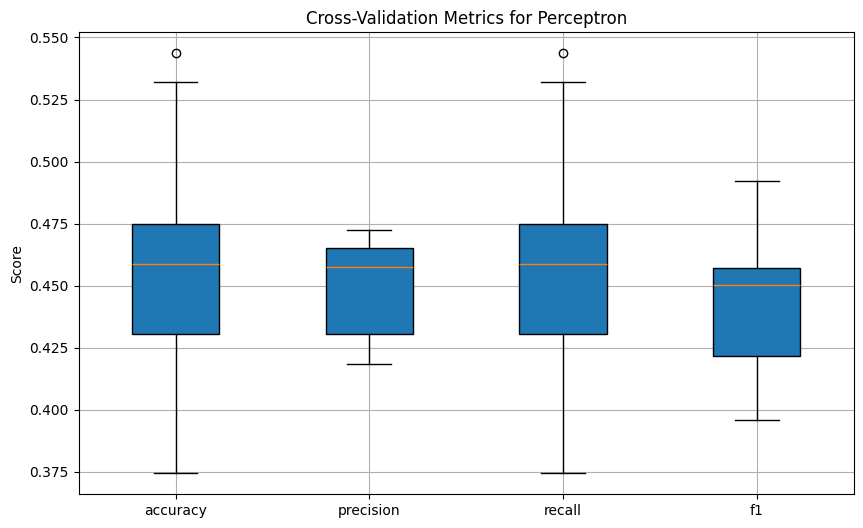

In [34]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import Perceptron
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define the perceptron model
perceptron = Perceptron(
    max_iter=1000,
    tol=1e-3,
    eta0=1.0,
    shuffle=True,
    random_state=42
)

# Use StratifiedKFold to ensure balanced splits for classification
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define scoring metrics
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform cross-validation for each metric
results = {}
for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(perceptron, x_scaled, y_encoded, cv=cv, scoring=scorer)
    results[metric_name] = scores
    print(f"{metric_name.capitalize()} scores: {scores}")
    print(f"Mean {metric_name.capitalize()}: {scores.mean():.4f}")
    print(f"Standard Deviation: {scores.std():.4f}")
    print()

# Visualize cross-validation results
import matplotlib.pyplot as plt

# Boxplot of metrics across folds
plt.figure(figsize=(10, 6))
plt.boxplot(results.values(), labels=results.keys(), patch_artist=True)
plt.title("Cross-Validation Metrics for Perceptron")
plt.ylabel("Score")
plt.grid()
plt.show()


## 6. Visualization

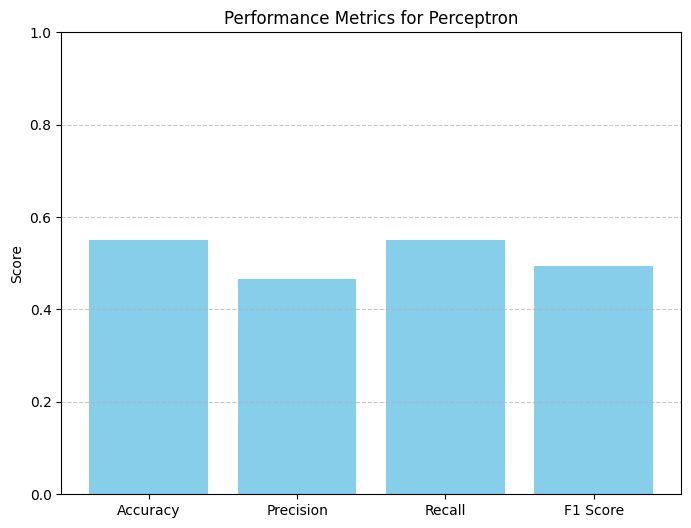

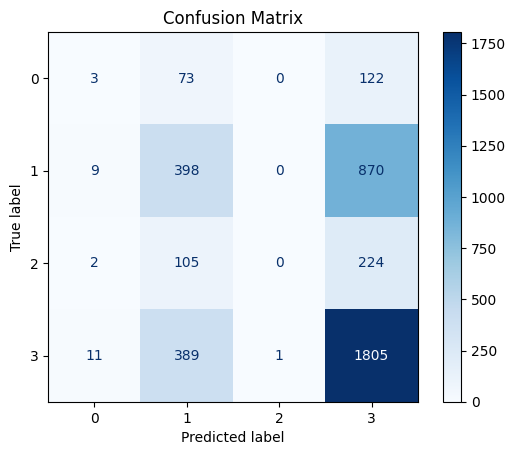

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Metrics to visualize
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

# Bar chart for metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color='skyblue')
plt.title("Performance Metrics for Perceptron")
plt.ylim(0, 1)  # Scores are between 0 and 1
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()